Choose a movie: 4
                                               name                 genres  \
0                       Father of the Bride Part II             ['Comedy']   
1                                       Nine Months             ['Comedy']   
2                           Something to Talk About             ['Comedy']   
3                                            Girl 6             ['Comedy']   
4  To Wong Foo, Thanks for Everything! Julie Newmar             ['Comedy']   
5                                    Mouth to Mouth  ['Comedy', 'Foreign']   

    budget      revenue runtime popularity vote_counts vote_averages  
0        0  7.65789e+07     106    8.38752         173           5.7  
1        0  6.96607e+07     103    8.48283         171           5.5  
2        0  5.08922e+07     106    3.74321          60           5.7  
3  1.2e+07  4.93994e+06     108    4.40517          17           5.7  
4        0  4.77742e+07     105    7.65345         117           6.3  
5        

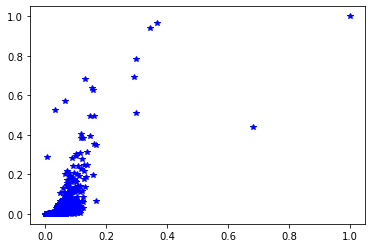

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def hamming_Distance(k, lst):
    ham_distance = list()
    for i in lst:
        count = 0
        for x,y in zip(k, i):
            if x != y:
                count = count + 1
        ham_distance.append(count)
    return ham_distance

def euclid_distance(k, lst):
    euclid_distance = list()
    for i in lst:
        euclid_distance.append(np.sqrt((k - i)** 2))
    return euclid_distance

class kNN():
    def __init__(self, data, radius):
        self.radius = radius
        ## Get data from CSV file #######
        self.csv = pd.read_csv(data)
        self.data = self.csv.to_numpy()[:,1:]
        
        ##### Normalize data ######
        
        budget = self.data[:, 2]     #### Budget data
        self.budget_Normalized = (budget - budget.min()) / (budget.ptp())
        
        revenue = self.data[:, 3]    ##### Revenue data
        self.revenue_Normalized = (revenue - revenue.min()) / (revenue.ptp())
        
        rt = np.nan_to_num(self.data[:, 4])    #### Runtime data
        runtime = np.array([i for i in rt])
        runtime[np.isnan(runtime)] = 0
        self.runtime_Normalized = (runtime - runtime.min()) / (runtime.ptp())
        
        popularity = self.data[:, 5]     #### Popularity data
        self.popularity_Normalized = (popularity - popularity.min()) / (popularity.ptp())
        
        vote_counts = self.data[:, 6]     #### Vote_counts data
        self.vote_counts_Normalized = (vote_counts - vote_counts.min()) / (vote_counts.ptp())
        
        self.vote_averages_Normalized = self.data[:, 7]     #### Vote_averages data
        
        self.gen = self.data[:,1]
        self.gen_encode = self.encode_Genres()               ##### Encode genres
        
        plt.plot(self.popularity_Normalized, self.vote_counts_Normalized, "b*")
        
    def encode_Genres(self):
        gen = self.data[:,1]
        s = set()
        for i in gen:
            lst = list()
            for k in i:
                lst.append(i.split(",")[0].replace("'","").replace("[", "").replace("]", ""))
            s = s | set(lst)
        genres = [i for i in s]
        genres.remove("")
        genres.sort()
        gen_encode = list()
        for k in range(0, len(gen)):
            st = list()
            for i in genres:
                if i in gen[k]:
                    st.append("1")
                else:
                    st.append("0")
            gen_encode.append("".join(st))
        return gen_encode
    
    def get_Distance(self, k):
        
        genres_distance = hamming_Distance(self.gen_encode[k], self.gen_encode)
        distance = np.array(genres_distance)
        
#         budget_distance = euclid_distance(self.budget_Normalized[k], self.budget_Normalized)
#         distance = distance + np.array(budget_distance)
        
#         revenue_distance = euclid_distance(self.revenue_Normalized[k], self.revenue_Normalized)
#         distance = distance + np.array(revenue_distance)
        
        runtime_distance = euclid_distance(self.runtime_Normalized[k], self.runtime_Normalized)
        distance = distance + np.array(runtime_distance)
        
        popularity_distance = euclid_distance(self.popularity_Normalized[k], self.popularity_Normalized)
        distance = distance + np.array(popularity_distance)

        vote_counts_distance = euclid_distance(self.vote_counts_Normalized[k], self.vote_counts_Normalized)
        distance = distance + np.array(vote_counts_distance)

        vote_averages_distance = euclid_distance(self.vote_averages_Normalized[k], self.vote_averages_Normalized)
        distance = distance + 0.1*np.array(vote_averages_distance)
        
        return distance, np.array(runtime_distance), np.array(popularity_distance), np.array(vote_counts_distance), np.array(vote_averages_distance)
    
    def Main(self):
        
        k = int(input("Choose a movie: "))
        distance, rt, pop, vc, va = self.get_Distance(k)
        def value(n):
            return distance[n]
        
        idx = np.argpartition(distance, self.radius + 1)
        idx1 = list(idx[:self.radius + 1])
        idx1.sort(key = value)
        result = pd.DataFrame(self.data[idx1], columns = self.csv.columns.values[1:])
        print(result.head(self.radius +1 ))
        print("\n Distance corresponding: ")
        print(*[distance[idx1]], sep = " - ")
        print("Distance:")
        print(rt[idx1])
        print(pop[idx1])
        print(vc[idx1])
        print(va[idx1])


test = kNN("data/movie.csv",5)
test.Main() 

In [ ]:
# ## Resnet
# ### Inception
# YOLO, SSD

In [8]:
a = [1 for i in test.gen if len(i) == 0]

In [9]:
a

[]